### Time Series Modeling

In [2]:
## import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## library versions
print('pandas version:', pd.__version__)
print('numpy version:', np.__version__)
print('seaborn version:', sns.__version__)

pandas version: 1.4.2
numpy version: 1.21.5
seaborn version: 0.11.2


In [28]:
## load dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df = pd.read_csv("us_retail_sales.csv")
print(df)

    YEAR     JAN     FEB     MAR     APR     MAY     JUN       JUL       AUG  \
0   1992  146925  147223  146805  148032  149010  149800  150761.0  151067.0   
1   1993  157555  156266  154752  158979  160605  160127  162816.0  162506.0   
2   1994  167518  169649  172766  173106  172329  174241  174781.0  177295.0   
3   1995  182413  179488  181013  181686  183536  186081  185431.0  186806.0   
4   1996  189135  192266  194029  194744  196205  196136  196187.0  196218.0   
5   1997  202371  204286  204990  203399  201699  204675  207014.0  207635.0   
6   1998  209666  209552  210832  213633  214639  216337  214841.0  213636.0   
7   1999  223997  226250  227417  229037  231235  231903  233948.0  236566.0   
8   2000  243436  247133  249825  245831  246201  248160  247176.0  247576.0   
9   2001  252654  252704  250328  254763  255218  254022  252997.0  254560.0   
10  2002  256307  257670  257059  261333  257573  259786  262769.0  265043.0   
11  2003  267230  263188  267820  267197

### 1. Plot the data with proper labeling and make some observations on the graph.

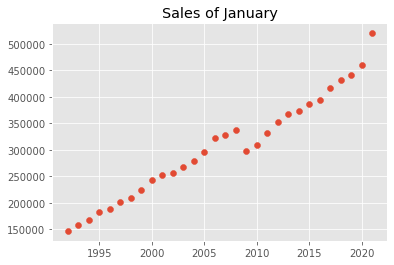

In [12]:
## scatterplot
plt.scatter(df["YEAR"], df["JAN"])
plt.title('Sales of January')
plt.show()

Observation: I was originally going to plot one month at a time to see if any months had downward trends, but after plotting, January/February/March, I noticed that this quarter all had similar growth. I decided to plot the year against one another to get an overall idea of the sales month over month. Looking at the chart below, 2020 had the most volatility, while the years leading up to it all stayed within the same general sales range. Earlier, 2008 also had more variety with the general year showing a downward trend January to December. 

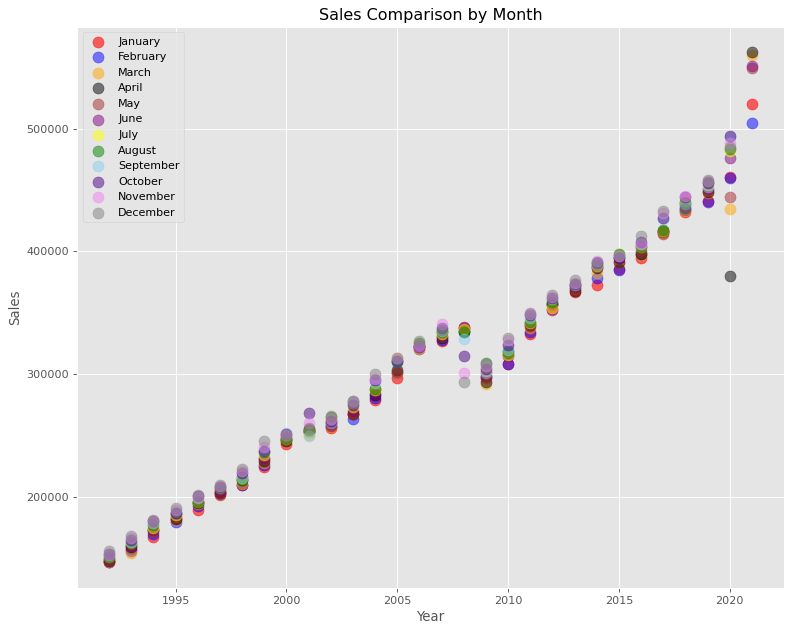

In [11]:
## scatterplot of months
## import library
from matplotlib.pyplot import figure

figure(figsize=(10, 8), dpi=80)
 
plt.style.use('ggplot')
 
plt.title('Sales Comparison by Month')
plt.xlabel('Year')
plt.ylabel('Sales')

plt.scatter(x = df['YEAR'],y = df['JAN'],s = 100,c = 'red',alpha = 0.6,marker = 'o', label = 'January')
plt.scatter( x= df['YEAR'],y = df['FEB'],s = 100,c = 'blue',alpha = 0.5,marker = 'o', label = 'February')
plt.scatter( x= df['YEAR'],y = df['MAR'],s = 100,c = 'orange',alpha = 0.5,marker = 'o', label = 'March')
plt.scatter( x= df['YEAR'],y = df['APR'],s = 100,c = 'black',alpha = 0.5,marker = 'o', label = 'April')
plt.scatter( x= df['YEAR'],y = df['MAY'],s = 100,c = 'brown',alpha = 0.5,marker = 'o', label = 'May')
plt.scatter( x= df['YEAR'],y = df['JUN'],s = 100,c = 'purple',alpha = 0.5,marker = 'o', label = 'June')
plt.scatter( x= df['YEAR'],y = df['JUL'],s = 100,c = 'yellow',alpha = 0.5,marker = 'o', label = 'July')
plt.scatter( x= df['YEAR'],y = df['AUG'],s = 100,c = 'green',alpha = 0.5,marker = 'o', label = 'August')
plt.scatter( x= df['YEAR'],y = df['SEP'],s = 100,c = 'skyblue',alpha = 0.5,marker = 'o', label = 'September')
plt.scatter( x= df['YEAR'],y = df['OCT'],s = 100,c = 'indigo',alpha = 0.5,marker = 'o', label = 'October')
plt.scatter( x= df['YEAR'],y = df['NOV'],s = 100,c = 'violet',alpha = 0.5,marker = 'o', label = 'November')
plt.scatter( x= df['YEAR'],y = df['DEC'],s = 100,c = 'gray',alpha = 0.5,marker = 'o', label = 'December')

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### 2. Split this data into a training and test set. Use the last year of data (July 2020 - June 2021) of data as your test set and the rest as your training set.

In [110]:
## change column names to numeric
df2 = df.set_axis(['YEAR', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'], axis = 1)
df2.head()

,YEAR,1,2,3,4,5,6,7,8,9,10,11,12
0,1992,146925,147223,146805,148032,149010,149800,150761.0,151067.0,152588.0,153521.0,153583.0,155614.0
1,1993,157555,156266,154752,158979,160605,160127,162816.0,162506.0,163258.0,164685.0,166594.0,168161.0
2,1994,167518,169649,172766,173106,172329,174241,174781.0,177295.0,178787.0,180561.0,180703.0,181524.0
3,1995,182413,179488,181013,181686,183536,186081,185431.0,186806.0,187366.0,186565.0,189055.0,190774.0
4,1996,189135,192266,194029,194744,196205,196136,196187.0,196218.0,198859.0,200509.0,200174.0,201284.0


In [214]:
## melt df
df_melt = pd.melt(df2, id_vars = ['YEAR'], value_vars = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])
df_melt.head()

,YEAR,variable,value
0,1992,1,146925.0
1,1993,1,157555.0
2,1994,1,167518.0
3,1995,1,182413.0
4,1996,1,189135.0


In [215]:
## add day value
df_melt['day']='1'
df_melt.head()

,YEAR,variable,value,day
0,1992,1,146925.0,1
1,1993,1,157555.0,1
2,1994,1,167518.0,1
3,1995,1,182413.0,1
4,1996,1,189135.0,1


In [216]:
## rename melt df columns
df_melt.columns = ['Year', 'Month', 'Sales', 'Day']
df_melt.head()

,Year,Month,Sales,Day
0,1992,1,146925.0,1
1,1993,1,157555.0,1
2,1994,1,167518.0,1
3,1995,1,182413.0,1
4,1996,1,189135.0,1


In [219]:
## consolidate year + month
df_melt['Date'] = pd.to_datetime(df_melt[['Day','Month','Year']], dayfirst=True) ## unable to change freq
df_melt.head()

,Year,Month,Sales,Day,Date
0,1992,1,146925.0,1,1992-01-01
1,1993,1,157555.0,1,1993-01-01
2,1994,1,167518.0,1,1994-01-01
3,1995,1,182413.0,1,1995-01-01
4,1996,1,189135.0,1,1996-01-01


In [220]:
## drop columns
df3 = df_melt
df3 = df3.drop('Year', axis=1)
df3 = df3.drop('Month', axis=1)
df3 = df3.drop('Day', axis=1)

## change order
df3 = df3[['Date', 'Sales']]
df3.head()

,Date,Sales
0,1992-01-01,146925.0
1,1993-01-01,157555.0
2,1994-01-01,167518.0
3,1995-01-01,182413.0
4,1996-01-01,189135.0


In [221]:
print(df3.dtypes)

Date     datetime64[ns]
Sales           float64
dtype: object


In [222]:
## drop rows as later troubleshoot attempt
df3 = df3.dropna()

In [223]:
df3 = df3.set_index(df3['Date'])
df3 = df3.sort_index()

In [227]:
## import library
from datetime import datetime

## split data 
split_date = datetime(2020, 6, 1)

train = df3.loc[df3['Date'] <= split_date]
test = df3.loc[df3['Date'] > split_date]

print('Train Dataset:',train.shape)
print('Test Dataset:',test.shape)


Train Dataset: (342, 2)
Test Dataset: (12, 2)


### 3. Use the training set to build a predictive model for the monthly retail sales.

In [246]:
## import library
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [259]:
y = train['Sales'] ## input
ARMAmodel = SARIMAX(y, order = (1, 0, 1)) ## define model
ARMAmodel = ARMAmodel.fit() ## fit model

## predictions
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

## challenges troubleshooting no frequency information output

C:\Users\alexi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alexi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alexi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [248]:
## troubleshooting errors
## code above to drop July 2021 columns on
df3.isnull().sum().sum()

0

In [231]:
## troubleshooting errors
## looking at secondary line
## possibly due to set index?
print(df3.shape)

(354, 2)


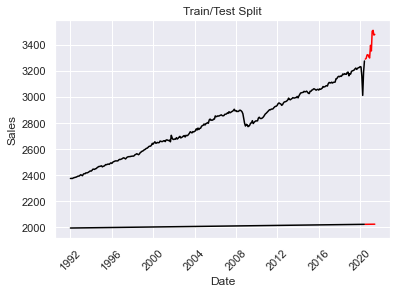

In [249]:
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('Sales')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test Split")
plt.show()

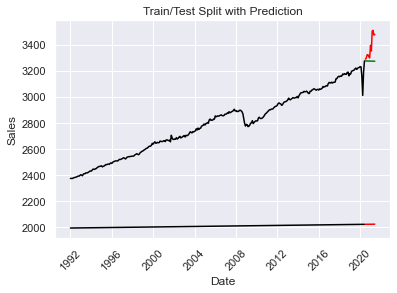

In [250]:
plt.plot(y_pred_out, color='green')
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('Sales')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test Split with Prediction")
plt.show()

In [251]:
## RMSE of training data
## import library
from sklearn.metrics import mean_squared_error

train_rmse = np.sqrt(mean_squared_error(test['Sales'].values, y_pred_df['Predictions']))
print("RMSE: ",train_rmse)

RMSE:  49316.86825188333


Observation: High RMSE in training set. Model performance is low based on historical trends. Visually, it looks like there is a stagnation or decrease whereas reality shows an increase.

In [254]:
## finetuning model
## import library
from statsmodels.tsa.arima.model import ARIMA

ARIMAmodel = ARIMA(y, order = (1, 1, 1))
ARIMAmodel = ARIMAmodel.fit()

## predictions
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out2 = y_pred_df["Predictions"] 

C:\Users\alexi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alexi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alexi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


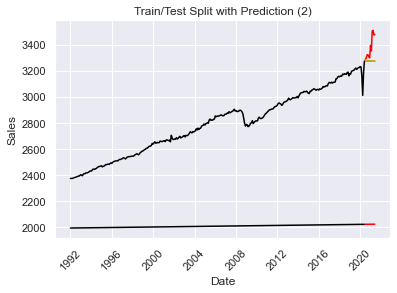

In [255]:
plt.plot(y_pred_out, color='green')
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.plot(y_pred_out2, color='orange')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test Split with Prediction (2)")
plt.show()

In [256]:
train_2_rmse = np.sqrt(mean_squared_error(test['Sales'].values, y_pred_df['Predictions']))
print("RMSE: ",train_2_rmse)

RMSE:  49316.86825188333


Observation: unsure if second prediction is overlaid upon first or if there is an additional error, but there was no improvement to the RMSE. I'm wondering if introducing seasonality would improve the model's performance. Troubleshooting hasn't led to any fixes for the model's automated frequency choice. I went back to the actual datetime logic and was unable to update to "datetime" or add "freq"

C:\Users\alexi\AppData\Local\Temp\ipykernel_10032\1929232825.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  rolling_mean = df3.rolling(window = 12).mean()
C:\Users\alexi\AppData\Local\Temp\ipykernel_10032\1929232825.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  rolling_std = df3.rolling(window = 12).std()


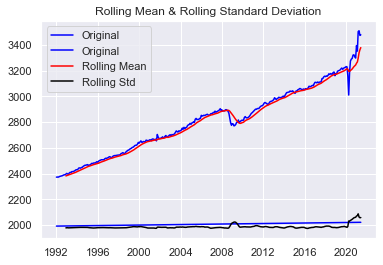

In [258]:
rolling_mean = df3.rolling(window = 12).mean()
rolling_std = df3.rolling(window = 12).std()
plt.plot(df3, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

## data is not stationary

### 4. Use the model to predict the monthly retail sales on the last year of data.

In [269]:
y = test['Sales'] ## input
ARMAmodel = SARIMAX(y, order = (1, 0, 1)) ## define model
ARMAmodel = ARMAmodel.fit() ## fit model

## predictions
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 


C:\Users\alexi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alexi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alexi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [270]:
test_rmse = np.sqrt(mean_squared_error(test['Sales'].values, y_pred_df['Predictions']))
print("RMSE: ",test_rmse)

RMSE:  46868.4980834692
